## salmon stats

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
pickle_in1 = open("/home/abhudia/Desktop/Wind speed/3points/winds_salmon2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/Wind speed/3points/winds_salmon2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/Wind speed/3points/winds_salmon2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/Wind speed/3points/winds_salmon2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [3]:
two = np.append(example1, example2)

In [4]:
three = np.append(two, example3)
full = np.append(three, example4)

In [5]:
wnd_avg = np.array([])
wnd_min = np.array([])
wnd_max = np.array([])
wnd_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_avg = np.append(wnd_avg, full[start:end].mean())
    wnd_min = np.append(wnd_min, full[start:end].min())
    wnd_max = np.append(wnd_max, full[start:end].max())
    wnd_std = np.append(wnd_std, full[start:end].std())

In [6]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [7]:
two = np.append(example1[:,56,258], example2[:,56,258])
three = np.append(two, example3[:,56,258])
fullc = np.append(three, example4[:,56,258])
fullc.shape

(35064,)

In [8]:
cur_avg = np.array([])
cur_min = np.array([])
cur_max = np.array([])
cur_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())
    cur_min = np.append(cur_min, fullc[start:end].min())
    cur_max = np.append(cur_max, fullc[start:end].max())
    cur_std = np.append(cur_std, fullc[start:end].std())

In [9]:
pickle_in1 = open("/home/abhudia/Desktop/salinity/3points/salmon2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/salinity/3points/salmon2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/salinity/3points/salmon2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/salinity/3points/salmon2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

two = np.append(example1, example2)
three = np.append(two, example3)
fulls = np.append(three, example4)

In [10]:
sal_avg = np.array([])
sal_min = np.array([])
sal_max = np.array([])
sal_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    sal_avg = np.append(sal_avg, fulls[start:end].mean())
    sal_min = np.append(sal_min, fulls[start:end].min())
    sal_max = np.append(sal_max, fulls[start:end].max())
    sal_std = np.append(sal_std, fulls[start:end].std())

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

In [20]:
print("overall mean for salinity = " + str(sal_avg.mean()))
print("overall mean for current = " + str(cur_avg.mean()))
print("overall mean for wind = " + str(wnd_avg.mean()))

overall mean for salinity = 29.956189975080818
overall mean for current = 0.3665997329970886
overall mean for wind = 5.048574745089782


In [21]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
hours = np.cumsum(np.array([0, 24*31, 24*28, 24*31, 24*30, 24*31, 24*30, 24*31, 
                            24*31, 24*30, 24*31, 24*30, 24*31]))

hours_leap = np.cumsum(np.array([0, 24*31, 24*29, 24*31, 24*30, 24*31, 24*30, 24*31, 
                            24*31, 24*30, 24*31, 24*30, 24*31]))

sal_monthly_avg = np.array([])
cur_monthly_avg = np.array([])
wnd_monthly_avg = np.array([])

for i in range(12):
    sal_monthly_avg = np.append(sal_monthly_avg, fulls[hours[i]:hours[i+1]].mean())
    cur_monthly_avg = np.append(cur_monthly_avg, fullc[hours[i]:hours[i+1]].mean())
    wnd_monthly_avg = np.append(wnd_monthly_avg, full[hours[i]:hours[i+1]].mean())

for i in range(12):
    sal_monthly_avg = np.append(sal_monthly_avg, fulls[8760+hours_leap[i]:8760+hours_leap[i+1]].mean())
    cur_monthly_avg = np.append(cur_monthly_avg, fullc[8760+hours_leap[i]:8760+hours_leap[i+1]].mean())
    wnd_monthly_avg = np.append(wnd_monthly_avg, full[8760+hours_leap[i]:8760+hours_leap[i+1]].mean())
    
for i in range(12):
    sal_monthly_avg = np.append(sal_monthly_avg, fulls[8760+8784+hours[i]:8760+8784+hours[i+1]].mean())
    cur_monthly_avg = np.append(cur_monthly_avg, fullc[8760+8784+hours[i]:8760+8784+hours[i+1]].mean())
    wnd_monthly_avg = np.append(wnd_monthly_avg, full[8760+8784+hours[i]:8760+8784+hours[i+1]].mean())
    
for i in range(12):
    sal_monthly_avg = np.append(sal_monthly_avg, fulls[2*8760+8784+hours[i]:2*8760+8784+hours[i+1]].mean())
    cur_monthly_avg = np.append(cur_monthly_avg, fullc[2*8760+8784+hours[i]:2*8760+8784+hours[i+1]].mean())
    wnd_monthly_avg = np.append(wnd_monthly_avg, full[2*8760+8784+hours[i]:2*8760+8784+hours[i+1]].mean())

sal_monthly_avg.shape

months_in_years = np.array([])
for i in range(12):
    months_in_years = np.append(months_in_years, "m" + str(i+1) + "y15")

for i in range(12):
    months_in_years = np.append(months_in_years, "m" + str(i+1) + "y16")

for i in range(12):
    months_in_years = np.append(months_in_years, "m" + str(i+1) + "y17")

for i in range(12):
    months_in_years = np.append(months_in_years, "m" + str(i+1) + "y18")

## Monthly averages

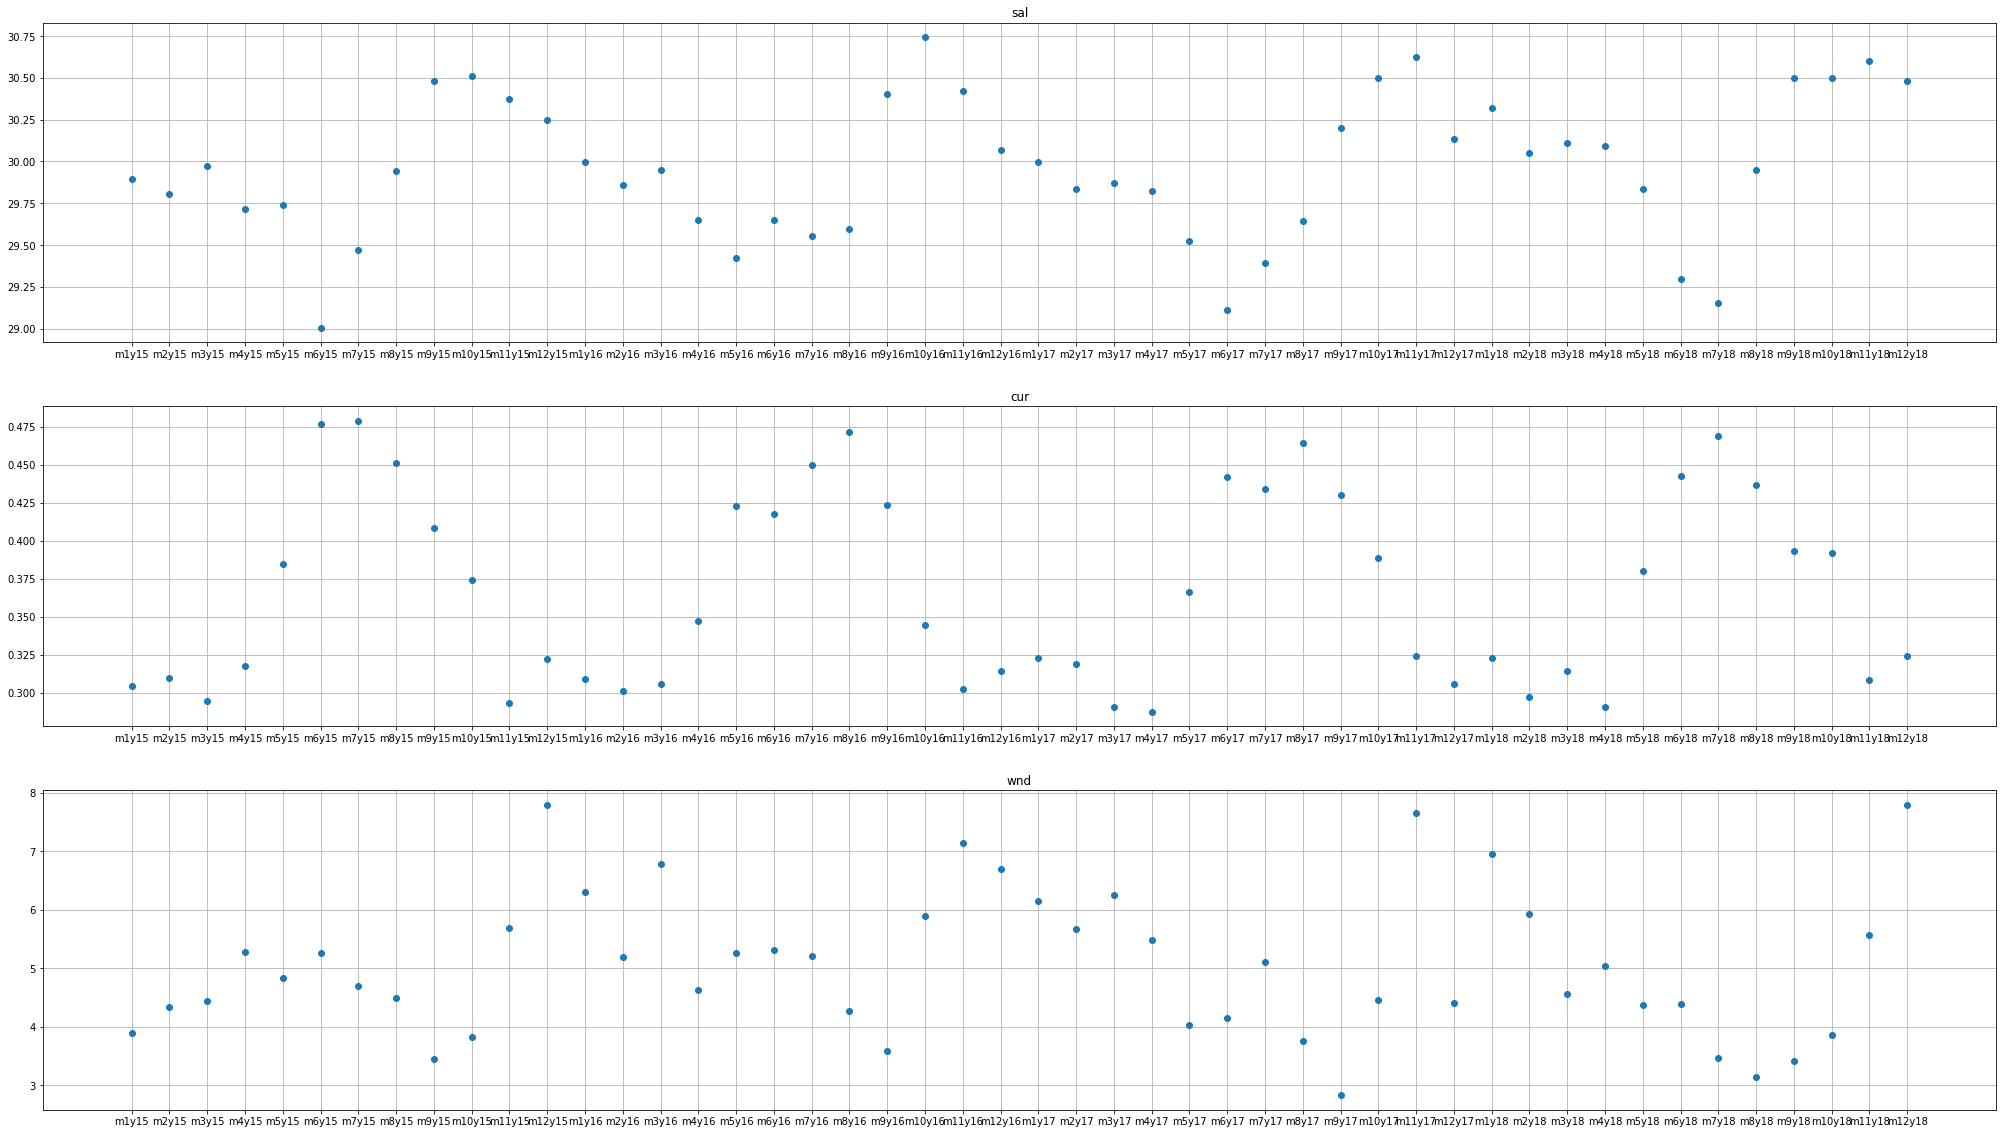

In [22]:
fig, ax = plt.subplots(3,1, figsize = (35,20))
ax[0].plot(months_in_years,sal_monthly_avg, 'o')
ax[0].set_title('sal')
ax[1].plot(months_in_years,cur_monthly_avg, 'o')
ax[1].set_title('cur')
ax[2].plot(months_in_years,wnd_monthly_avg, 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');

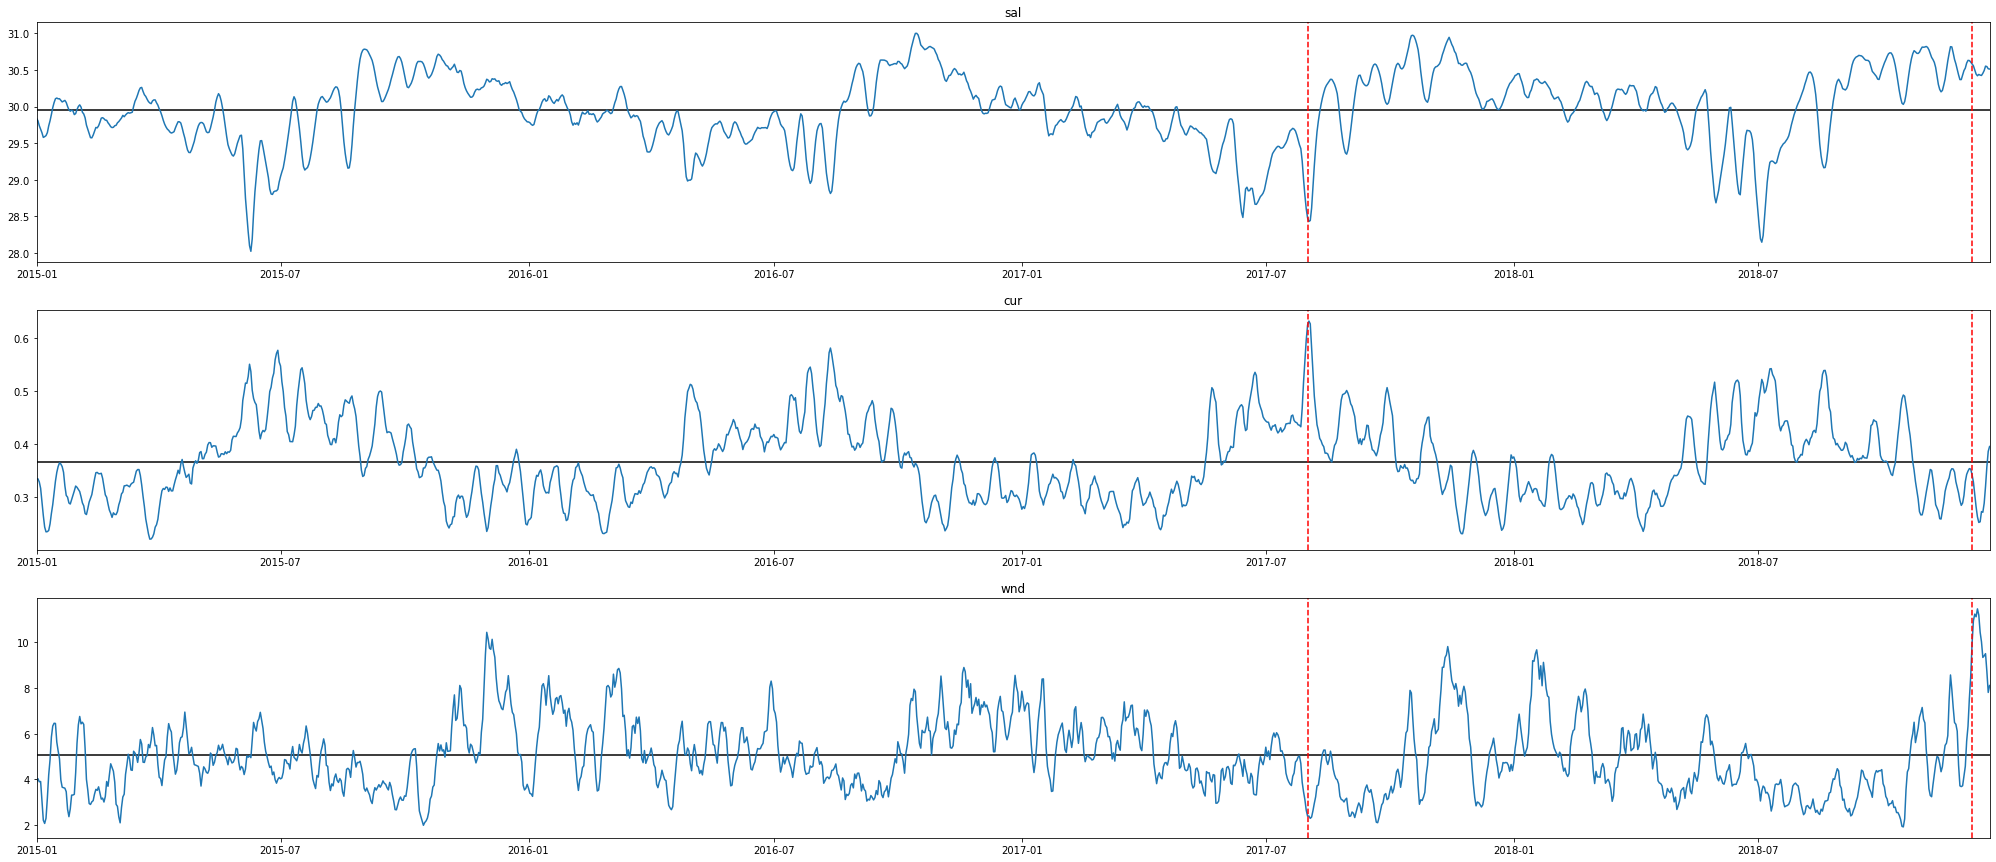

In [16]:
fig, ax = plt.subplots(3,1, figsize = (35,15))
ax[0].plot(dates, sal_avg)
ax[0].set_title('sal')
ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(dates,cur_avg)
ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('cur')

ax[2].plot(dates,wnd_avg)
ax[2].set_title('wnd')
ax[2].hlines(full.mean(), dates[0], dates[-1])
for ax in ax:
    ax.set_xlim(dates[0], dates[-1])
    ax.axvline(datetime.date(2017,8,1), color='r', ls='--')
    ax.axvline(datetime.date(2018,12,7), color='r', ls='--');
#fig.savefig('/home/vdo/Pictures/salmon-choices.png', bbox_inches='tight');

(23,)


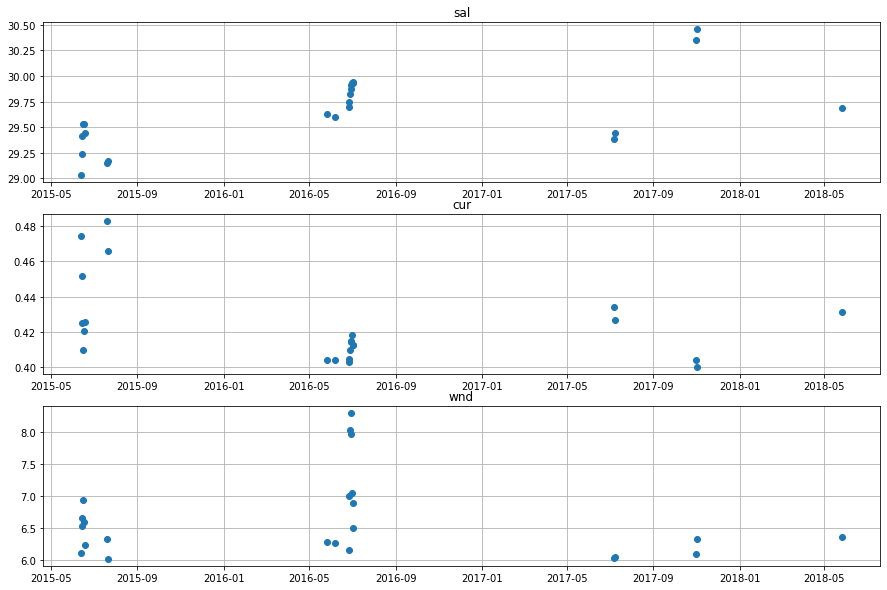

In [14]:
#looking for days with high sal, wnd, and cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)],
           sal_avg[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)],
           cur_avg[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)],
           wnd_avg[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg > 29) & (cur_avg > 0.4) & (wnd_avg > 6)].shape)

(76,)


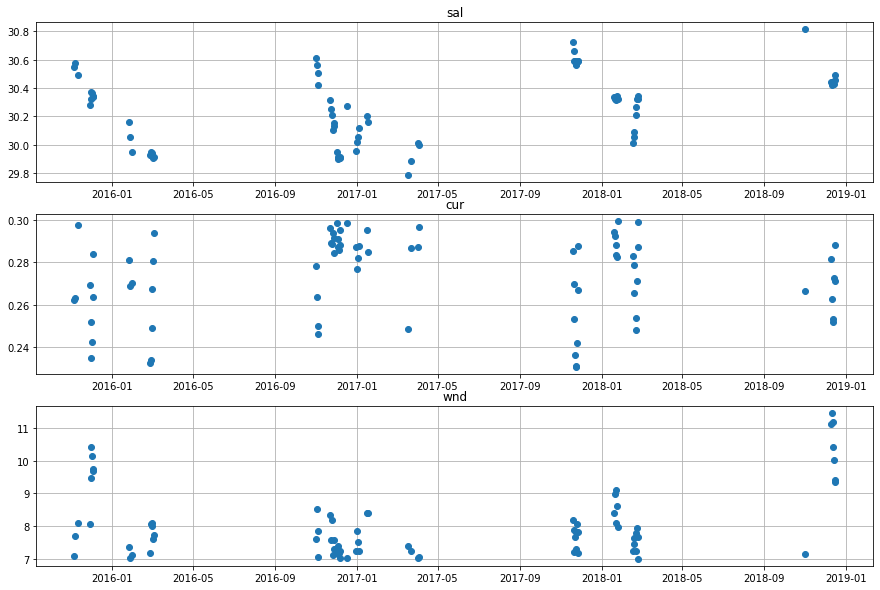

In [15]:
#looking for days with high sal, wnd, and low cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)],
           sal_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)],
           cur_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)],
           wnd_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg > 7)].shape)

(45,)


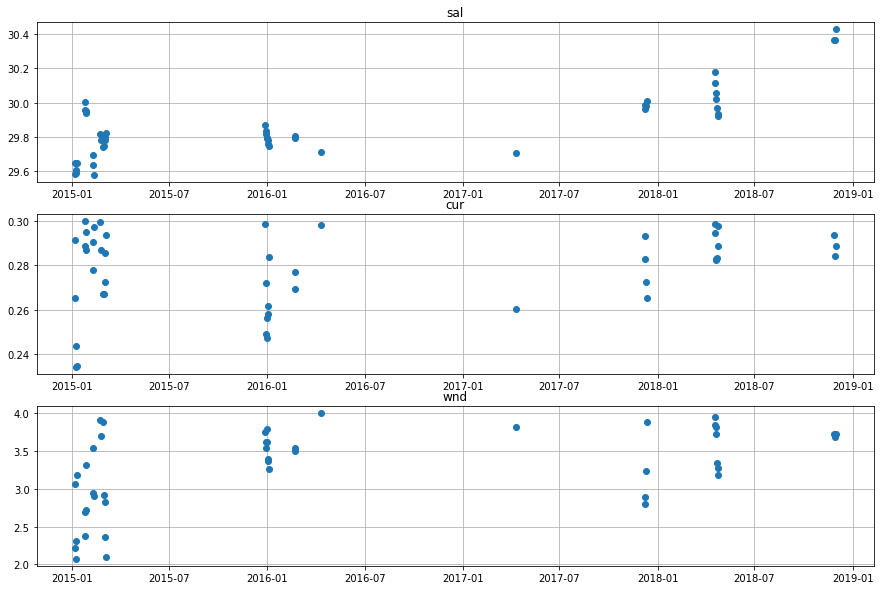

In [16]:
#looking for days with high sal, low wnd, and low cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)],
           sal_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)],
           cur_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)],
           wnd_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg > 25) & (cur_avg < 0.3) & (wnd_avg < 4)].shape)

(14,)


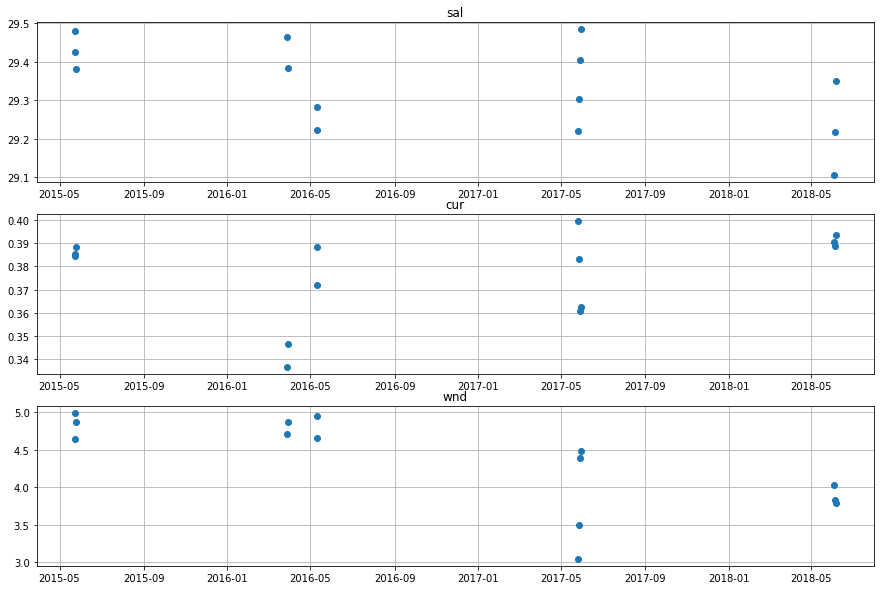

In [17]:
#looking for days with low sal, low wnd, and low cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)],
           sal_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)],
           cur_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)],
           wnd_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg < 5)].shape)

(24,)


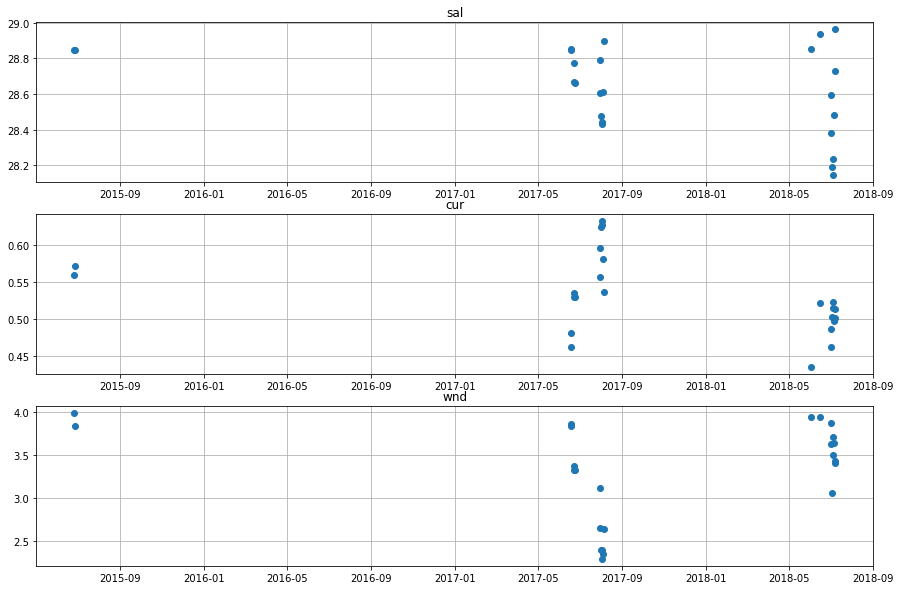

In [18]:
#looking for days with low sal, low wnd, and lhigh cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)],
           sal_avg[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)],
           cur_avg[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)],
           wnd_avg[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg < 29) & (cur_avg > 0.4) & (wnd_avg < 4)].shape)

(10,)


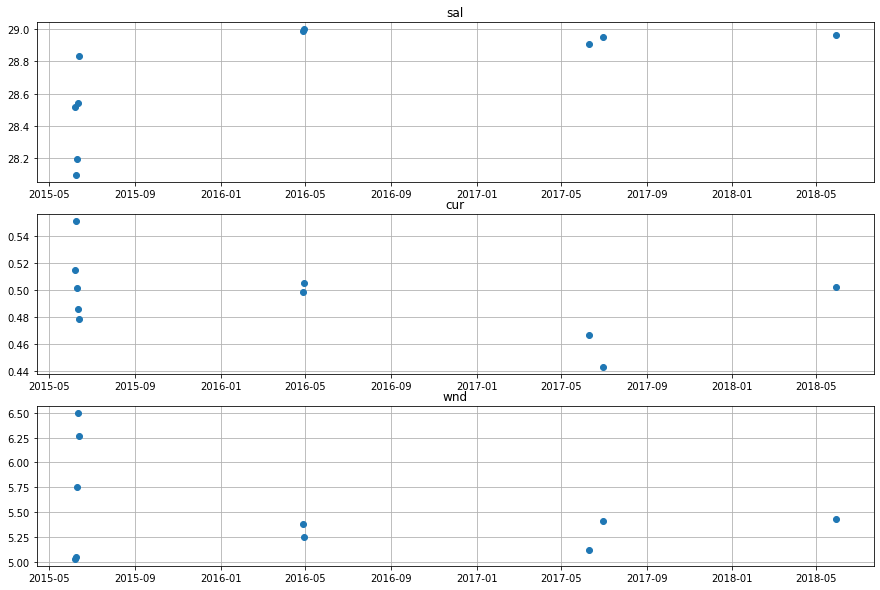

In [26]:
#looking for days with low sal, high wnd, and high cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)],
           sal_avg[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)],
           cur_avg[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)],
           wnd_avg[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg < 29) & (cur_avg > 0.3) & (wnd_avg > 5)].shape)

(13,)


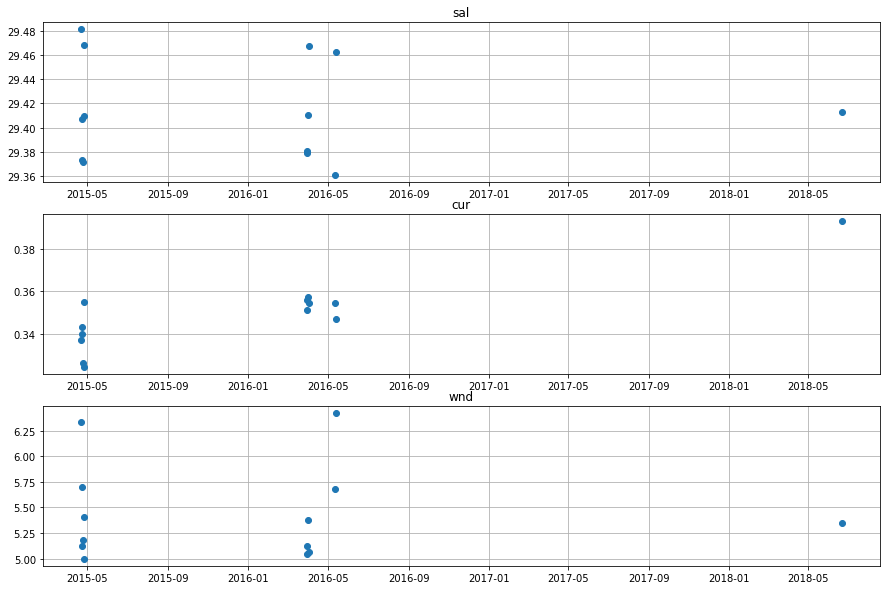

In [30]:
#looking for days with low sal, high wnd, and low cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)],
           sal_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)],
           cur_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)],
           wnd_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg < 29.5) & (cur_avg < 0.4) & (wnd_avg > 5)].shape)

(33,)


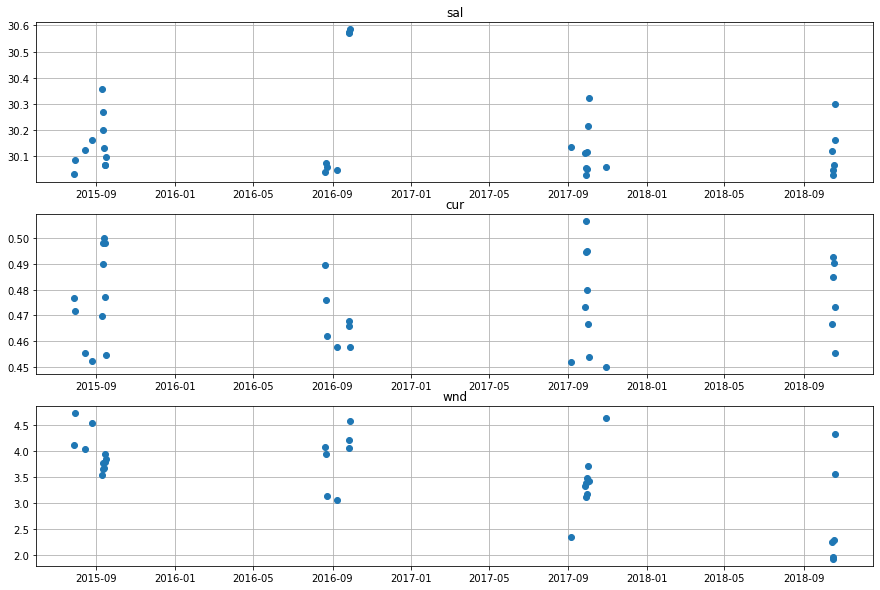

In [21]:
#looking for days with high sal, low wnd, and high cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)],
           sal_avg[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)],
           cur_avg[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)],
           wnd_avg[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(sal_avg > 30) & (cur_avg > 0.45) & (wnd_avg < 5)].shape)

### Correlation between wind speed and surface current speed

In [17]:
np.corrcoef(full, fullc)

array([[ 1.        , -0.13773055],
       [-0.13773055,  1.        ]])

### Correlation between wind speed and surface salinity

In [18]:
np.corrcoef(full, fulls)

array([[1.        , 0.22056949],
       [0.22056949, 1.        ]])

### Correlation between surface salinity and surface current speed

In [19]:
np.corrcoef(fulls, fullc)

array([[ 1.        , -0.27736429],
       [-0.27736429,  1.        ]])